## Strassen homework

#### Exercise 1/2

The generalized version of the strassen multiplication algorithm to non rectangular matrices can be found in the matrix.py file, here I will analize the effect on the execution time

The time complexity for multipling two square matrices with size power of two is $T(n) = \Theta(n^{\log_2(7)})$  
This also holds for matrices of uneven size because I can pad the matrices with zeros until I reach the next power of two and make use of the identity
$$\begin{pmatrix}
A & 0 \\
0 & 0 
\end{pmatrix}
\begin{pmatrix}
B & 0 \\
0 & 0 
\end{pmatrix}
= 
\begin{pmatrix}
AB & 0 \\
0 & 0 
\end{pmatrix}$$

The time complexity of this algorithm will be:
$$T(n) \leq T(a \cdot n) = \Theta((a \cdot n)^{\log_2(7)}) = \Theta(a^{\log_2(7)} \cdot n^{\log_2(7)}) = \Theta(n^{\log_2(7)})$$
Where $a<2$  

In the matrix.py file I don't scale up the matrices to the next power of two but I add a column or row in case the matrix is odd, this case performs less operations than the one discussed above so the implementation remains $\Theta(n^{\log_2(7)})$

For two rectangular matrices of sizes $m$ x $n$ and $n$ x $o$ with $m$, $n$, $o$ power two the execution time is:
$$
T(n, m, o)=
\begin{cases}
5/4 \,(m n + o n) + 7 \cdot T(n/2, m/2, o/2) \quad \max(n, m, o) \geq 64\\
\alpha \quad \max(n, m, o) < 64
\end{cases}
$$
The problem with this recursion is that we don't know $\max(n, m, o)$ which is related to the upper bound of the summation, so we define $M = \max(n, m, o)$  

$$T(n, m, o) = \frac{5}{4}\alpha \sum_{i=0}^{\log_2 M} (7/4)^i n\cdot(m+o) = \frac{5}{4}n\cdot(m+o) \frac{(7/4)^{\log_2(M)+1} - 1}{7/4 - 1} =
\Theta(n\cdot(m+o)(7/4)^{\log_2 M}) = \Theta(n\cdot(m+o)M^{\log_2(7/4)})$$
If we suppose that $n$ is the maximum among the three indices we get
$$T(n, m, o) = \Theta((m+o)n^{\log_2(7) - 1})$$
From this formula is clear that if $n = m = o$ we get the usual strassen matrix multiplication complexity

We can generalize this formula to non-power-of-two matrices like we did before: Using the above matrix identity and by padding the matrices
$$T(n, m, o) \leq T(a n, b m, c o) = \Theta(an\cdot(bm+co)\cdot \max(a,b,c)M^{\log_2(7/4)}) = \Theta(n\cdot(m+o)M^{\log_2(7/4)})$$
Where $a, b, c<2$  



In [3]:
from matrix import *
from random import random, randint
import pytest

def random_matrix(rows: int, cols: int) -> Matrix:
    """
    Returns a matrix filled with uniformly distributed random values

    Parameters
    ----------
    rows: int
        Number of rows
    cols: int
        Number of columns

    Returns
    -------
    Matrix
        Matrix filled with random values
    """

    return Matrix([[random() for j in range(cols)] for i in range(rows)], clone_matrix=False)

# Tests whether the strassen multiplication actually works
for i in range(10):
    # Generate random matrix sizes
    n, m, o = randint(1, 100), randint(1, 100), randint(1, 100)
    # Generate two uniformly distributed random matrices
    A, B = random_matrix(m, n), random_matrix(n, o)
    
    # I test both the standard strassen and the efficient version with less memory usage
    assert max(max(gauss_matrix_mult(A, B) - better_strassen_matrix_mult(A, B))) == pytest.approx(0.)
    assert max(max(gauss_matrix_mult(A, B) - strassen_matrix_mult(A, B))) == pytest.approx(0., rel=1e-12)

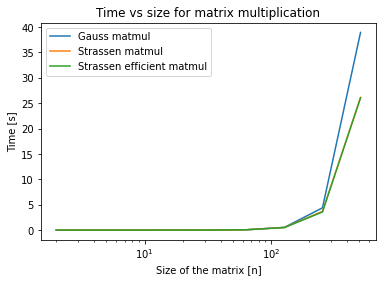

In [5]:
# Exercise 3:
import time
from IPython.display import clear_output
import pylab as pl

# Sizes to consider
all_n = [2**i for i in range(1, 10)]
time_gauss = []
time_strassen_naive = []
time_strassen_better = []

f = open("matrix-times.txt", "w")
f.write("# Gauss_matmul/strassen_matmul/memory_efficient_strassen_matmul")
for n in all_n:
    # Generate two uniformly distributed random matrices
    A, B = random_matrix(n, n), random_matrix(n, n)
    f.write(f"{n} ")
    # Time of the gauss matmul
    start = time.time()
    gauss_matrix_mult(A, B)
    time_gauss.append(time.time() - start)
    f.write(f"{time_gauss[-1]} ")

    # Time of the naive strassen matmul
    start = time.time()
    strassen_matrix_mult(A, B)
    time_strassen_naive.append(time.time() - start)
    f.write(f"{time_strassen_naive[-1]} ")

    # Time of the efficient strassen matmul
    start = time.time()
    better_strassen_matrix_mult(A, B)
    time_strassen_better.append(time.time() - start)
    f.write(f"{time_strassen_better[-1]}\n")

    # To track progress
    print("done:", n)
    
f.close()
# Clears the output of the cell
clear_output()

# Plot the curves
pl.plot(all_n, time_gauss, label="Gauss matmul")
pl.plot(all_n, time_strassen_naive, label="Strassen matmul")
pl.plot(all_n, time_strassen_better, label="Strassen efficient matmul")
pl.xscale("log")
pl.ylabel("Time [s]")
pl.xlabel("Size of the matrix [n]")
pl.title("Time vs size for matrix multiplication")
pl.legend()
pl.savefig("Time-comparison.png", dpi=300)

#### Exercise 4

With the new implementation of the strassen algorithm (better_strassen_matrix_mult in module matrix.py) we reduced by a lot the number of extra memory space needed, for a single iteration we only need two submatrices storing the sums and one matrix storing the product, along with the full matrix which contains the final result, this gives the following formula for the space complexity
$$
S(n, m, o)=
\begin{cases}
1/4 \,(m n + o n + m o) + mo + S(n/2, m/2, o/2) \quad \max(n, m, o) \geq 64\\
\alpha \quad \max(n, m, o) < 64
\end{cases}
$$
Where I consider $m$ $n$ $o$ power of two, note that this is a similar formula as for the time complexity, however we only have $S(n/2, m/2, o/2)$ instead of $7 \cdot S(n/2, m/2, o/2)$ because we were able to rearrange the operations such that we store only a product at a time. Solving the recursion gives:

$$S(n, m, o) = \alpha \cdot (4^{-1} (mn + no + mo) + mo) \sum_{i=0}^{log_2 M} 4^{-i} =
\alpha \cdot (4^{-1} (mn + no + mo) + mo) \cdot \frac{4}{3}\bigg(1 - \frac{1}{M^2}\bigg) =
\Theta(mn + no + mo)$$

Where in the last step I used the fact that $(1 - M^{-2}) \leq 1$

For non power of two matrices we reason like before:
$$S(n, m, o) \leq S(an, bm, co) = \Theta(ab\cdot mn + ac\cdot no + bc\cdot mo) = \Theta(mn + no + mo)$$
